## Improting Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten ,MaxPooling2D
from keras.datasets import mnist
from keras.utils import to_categorical

In [3]:
%matplotlib inline

## Load dataset

In [4]:
mnist = mnist.load_data()

11493376/11490434 [==============================] - 16s 1us/step


## spliting the dataset

In [5]:
(X_train,y_train) , (X_test,y_test) = mnist

In [9]:
X_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [15]:
X_train[8]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   5,
         63, 197,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

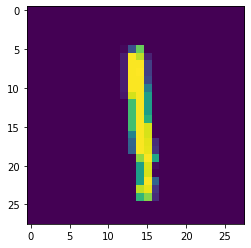

In [16]:
plt.imshow(X_train[8]);

In [17]:
y_train[8]

1

In [20]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [21]:
y_train_h = to_categorical(y_train)
y_test_h = to_categorical(y_test)

In [23]:
y_train_h[8]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [31]:
def generate_model():
    model = Sequential()
    # creating first convolutional layer
    model.add(Conv2D(32, kernel_size = 3, activation = 'relu', input_shape = (28,28,1), padding = 'same'))
    #keras.layers.MaxPool2D(pool_size = 4)
    
    #creating 2nd convolutional layer
    model.add(Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same'))
    #keras.layers.MaxPool2D(pool_size = 4)
    
    #fully connected classifier
    model.add(Flatten())
    model.add(Dense(10, activation = 'softmax'))
    return model

### compile the model

In [32]:
model = generate_model()
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [37]:
hist_ = model.fit(X_train, y_train_h, validation_data = (X_test, y_test_h), epochs = 3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 2228s 37ms/step - loss: 0.0307 - accuracy: 0.9911 - val_loss: 0.1240 - val_accuracy: 0.9746
Epoch 2/3
60000/60000 [==============================] - 2271s 38ms/step - loss: 0.0275 - accuracy: 0.9920 - val_loss: 0.1254 - val_accuracy: 0.9792
Epoch 3/3
60000/60000 [==============================] - 2141s 36ms/step - loss: 0.0269 - accuracy: 0.9929 - val_loss: 0.1496 - val_accuracy: 0.9770


C:\Users\Chandan\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


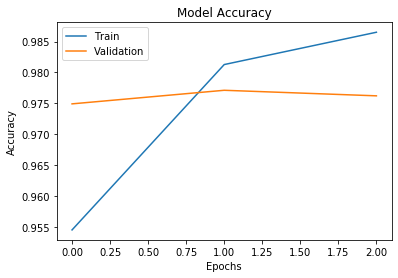

In [41]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'], loc = 'upper_left')
plt.show()

In [34]:
def generate_model2():
    model = Sequential()
    # creating first convolutional layer
    model.add(Conv2D(32, kernel_size = 3, activation = 'relu', input_shape = (28,28,1), padding = 'same'))
    keras.layers.MaxPool2D(pool_size = 4)
    
    #creating 2nd convolutional layer
    model.add(Conv2D(64, kernel_size = 3, activation = 'relu', padding = 'same'))
    keras.layers.MaxPool2D(pool_size = 4)
    
    #fully connected classifier
    model.add(Flatten())
    model.add(Dense(10, activation = 'softmax'))
    return model

In [35]:
model2 = generate_model2()
model2.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [36]:
hist = model2.fit(X_train, y_train_h, validation_data = (X_test, y_test_h), epochs = 3)

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 1920s 32ms/step - loss: 0.3113 - accuracy: 0.9545 - val_loss: 0.0782 - val_accuracy: 0.9749
Epoch 2/3
60000/60000 [==============================] - 2223s 37ms/step - loss: 0.0605 - accuracy: 0.9813 - val_loss: 0.0816 - val_accuracy: 0.9771
Epoch 3/3
60000/60000 [==============================] - 2252s 38ms/step - loss: 0.0437 - accuracy: 0.9865 - val_loss: 0.0933 - val_accuracy: 0.9762


### Visualising the data

C:\Users\Chandan\anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'upper_left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


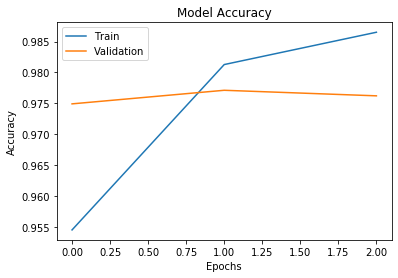

In [39]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train','Validation'], loc = 'upper_left')
plt.show()

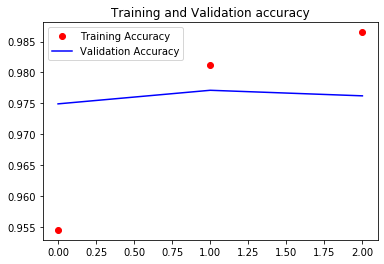

In [40]:
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'ro', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

In [44]:
test = pd.read_csv(r'C:\Users\Chandan\DigitRecognitionCNN\test.csv')

In [45]:
test = test / 255.0
test = test.values.reshape(-1,28,28,1)

In [46]:
# predict results
results = model.predict(test)

# select the indix with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

In [47]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("mnist_cnn_1.0.csv",index=False)